# Final Project: Big Data in Extreme Environments
## Spring 2021
### Tyler Bull

### 1.1  Setup and Import Relevant Packages
##### Relevant packages include: metpy: for map plotting the data, csv: for reading csv data files, numpy: for calculations, matplotlib: for plotting data, pandas: for handling the data

In [2]:
# Import Relevant Packages
import csv
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.patches import Patch
import pandas as pd
import os
from scipy.stats import linregress as reg

ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (C:\Users\tlubu\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py)

### 1.2 Import Preliminary Datasets for Preliminary Analysis
##### The population and landmass data will be used for selecting countries that had a change in population density

In [2]:
# Import Population Data
pop = pd.read_csv("Population Data.csv")
area = pd.read_csv("landmass.csv")
area.columns = ['Country','na','na','Area','na','na','na','na','na','na','na','na','na','na','na','na','na','na','na','na']
area = area.drop(columns='na')
area.head()

,Country,Area
0,Afghanistan,647500
1,Albania,28748
2,Algeria,2381740
3,American Samoa,199
4,Andorra,468


### 1.3 Format Data for Use

In [3]:
# Drop Unneeded Columns and NaN Rows
pop = pop.drop(columns = ['Series Name','Series Code']).dropna()
pop.head()

,Country Name,Country Code,2000 [YR2000],2005 [YR2005],2010 [YR2010],2015 [YR2015],2019 [YR2019]
0,Afghanistan,AFG,20779953.0,25654277.0,29185507.0,34413603,38041754
1,Albania,ALB,3089027.0,3011487.0,2913021.0,2880703,2854191
2,Algeria,DZA,31042235.0,33149724.0,35977455.0,39728025,43053054
3,American Samoa,ASM,57821.0,59562.0,56079.0,55812,55312
4,Andorra,AND,65390.0,78867.0,84449.0,78011,77142


In [4]:
# Collect list of countries from the MODIS Data and area data
file_list=os.listdir()
file_list = [s.replace("modis_2000_","") for s in file_list]
countries = [s.replace(".csv","") for s in file_list]
countries2 = [s.replace(" ","") for s in area.Country.tolist()]

In [5]:
# Remove Countries not in the MODIS and Area data from the Population data
pop = (pop[pop['Country Name'].isin(countries)])
pop = (pop[pop['Country Name'].isin(countries2)])

# Remove misfit data '..'
pop = (pop[pop['2015 [YR2015]'] != '..'])

### 2.1 Perform Initial Calculations from Data
##### Determine countries with the larges percent change in their populations, both positive and negative. Furthermore determine the 5 countries with the least change over the time basis. Not all of these categories have equivalent quantity, as a relitively few countries had low change in population, or a decrease in population of > 8 %.

In [6]:
# Calculate Percent change across time domain
diff = 100*np.divide(pop["2019 [YR2019]"].astype('float') - pop["2000 [YR2000]"].astype('float'),pop["2019 [YR2019]"].astype('float'))
pop["Pct"]= diff
pop["absPct"] = abs(diff)

In [7]:
# Create new dataframes with maximum increase, maximum decrease and minimum change.
# Add the Area Column with Areas of the Countries

### 2.1.1 Find the 10 countries with the highest increase in population from 2000 - 2015

In [114]:
maxPos = pop.nlargest(10,'Pct')
maxPos.columns = ['Country','Code','2000','2005','2010','2015','2019','Pct','Area']
a = maxPos.Country.tolist()
a = [sub + " " for sub in a]
b=[]
for s in a:
    b = np.append(b,area.Area.loc[area.Country == s].values.item())
maxPos.Area = b
maxPos.head()

,Country,Code,2000,2005,2010,2015,2019,Pct,Area
158,Qatar,QAT,592468.0,865416.0,1856327.0,2565710,2832067,79.080015,11437.0
147,Oman,OMN,2267973.0,2511251.0,3041434.0,4267348,4974986,54.412475,212460.0
142,Niger,NER,11331557.0,13624467.0,16464025.0,20001663,23310715,51.389063,1267000.0
105,Kuwait,KWT,2045123.0,2270198.0,2991884.0,3835591,4207083,51.388575,17820.0
98,Jordan,JOR,5122493.0,5765635.0,7261539.0,9266575,10101694,49.290753,92300.0


### 2.1.2 Find the 7 countries with the highest decrease in population from 2000 - 2015
##### Only 7 selected because the 8th highest country decreased by less than 5%.

In [115]:
maxNeg = pop.nsmallest(7,'Pct')
maxNeg.columns = ['Country','Code','2000','2005','2010','2015','2019','Pct','Area']
maxNeg.head(15)
a = maxNeg.Country.tolist()
a = [sub + " " for sub in a]
b=[]
for s in a:
    b = np.append(b,area.Area.loc[area.Country == s].values.item())
maxNeg.Area = b
maxNeg.head(15)

,Country,Code,2000,2005,2010,2015,2019,Pct,Area
29,Bulgaria,BGR,8170172.0,7658972.0,7395599.0,7177991,6975761,-17.122304,110910.0
159,Romania,ROU,22442971.0,21319685.0,20246871.0,19815616,19366221,-15.887199,237500.0
202,Ukraine,UKR,49176500.0,47105171.0,45870741.0,45154036,44386203,-10.792311,603700.0
47,Croatia,HRV,4468302.0,4310145.0,4295427.0,4203604,4065253,-9.914487,56542.0
128,Moldova,MDA,2923783.0,2888111.0,2861487.0,2834530,2663251,-9.782480,33843.0
71,Georgia,GEO,4077131.0,3902469.0,3786695.0,3725276,3720161,-9.595552,69700.0
167,Serbia,SRB,7516346.0,7440769.0,7291436.0,7095383,6945235,-8.223062,88361.0


### 2.1.3 Find the 5 countries with the least change in population from 2000 - 2015
##### Only 5 selected because the 6th country changed by greater than 2%

In [10]:
minChg = pop.nsmallest(5,'absPct')
minChg.columns = ['Country','Code','2000','2005','2010','2015','2019','Pct','Area']
minChg.head(15)
a = minChg.Country.tolist()
a = [sub + " " for sub in a]
b=[]
for s in a:
    b = np.append(b,area.Area.loc[area.Country == s].values.item())
minChg.Area = b
minChg.head(15)

,Country,Code,2000,2005,2010,2015,2019,Pct,Area
156,Portugal,PRT,10289898.0,10503330.0,10573100.0,10358076,10286263,-0.035338,92391.0
97,Japan,JPN,126843000.0,127773000.0,128070000.0,127141000,126264931,-0.457822,377835.0
155,Poland,POL,38258629.0,38165445.0,38042794.0,37986412,37965475,-0.772159,312685.0
75,Greece,GRC,10805808.0,10987314.0,11121341.0,10820883,10717169,-0.827075,131940.0
72,Germany,DEU,82211508.0,82469422.0,81776930.0,81686611,83092962,1.060805,357021.0


### 3.1 Import Fire Data of the Selected Countries for All Years
##### First step of importing the relevant datasets for analysis from the fire data. A few functions are created to assist in handling the datasets.

In [11]:
# Extracting the list of countries for import
maxPosList = maxPos['Country'].tolist()
maxNegList = maxNeg['Country'].tolist()
minChgList = minChg['Country'].tolist()

In [12]:
def import_fire_data(list):
    for m in list:
        for n in [2000, 2005, 2010, 2015, 2019]:
            filename = 'modis_'+str(n)+'_'+str(m)+".csv"
            globals()[str(m)+str(n)] = pd.read_csv(str(filename))
            globals()[str(m)+str(n)] = globals()[str(m)+str(n)].drop(columns = ['scan','track','instrument','satellite','version','frp','type','daynight']).dropna()

In [77]:
# use the functions to import the data
import_fire_data(maxPosList)
import_fire_data(maxNegList)
import_fire_data(minChgList)

### 3.2 Examine basic size and shape of the datasets
##### Total Countries: 22, Total Datapoints in Population Data: 132, Total Datapoints in Fire Data [7 x n shape]: 719460
##### Relevant variables: Area, Population, Latitude, Longitude, Acquisition Date, Acquisition Time, Confidence, Brightness

In [109]:
# A function which will be used frequently, loops through all years and countries associated with the
# lists: maxPosList, maxNegList, minChgList to do various operations on these sets. 
# Walking function is redfined as needed in this case, it calulates length
def walkingFunction(m,n,dataset):
    return 

def loopAllSets(list1,emptyarray):
    for m in list1:
        for n in [2000, 2005, 2010, 2015, 2019]:
            emptyarray = np.vstack([emptyarray,walkingFunction(m,n,globals()[str(m)+str(n)])])
    data = np.delete(emptyarray,0,0)
    return data

In [110]:
# show header information of one of the datasets, these are the columns that will be considered.
Japan2000.head()

,latitude,longitude,brightness,acq_date,acq_time,confidence,bright_t31
0,40.5316,141.5008,325.4,2000-11-03,1232,100,281.2
1,40.5350,141.5052,313.4,2000-11-04,209,0,289.5
2,34.8174,137.0758,304.3,2000-11-04,211,49,292.7
3,34.6329,137.1822,301.9,2000-11-04,211,43,291.1
4,34.1686,131.2222,304.2,2000-11-04,211,57,294.0


In [111]:
# define the walking function as a length calculation
def walkingFunction(m,n,dataset):
    return np.array([m, n, len(dataset)])


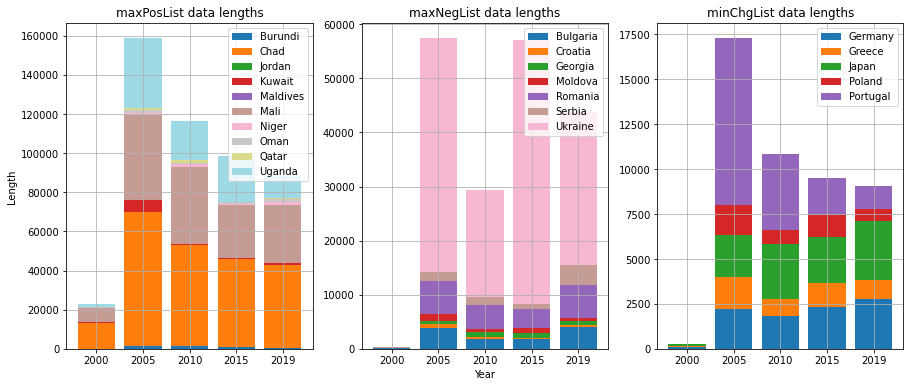

In [112]:
# Create stacked plots of the lengths for each dataset
count = -1
totalLength = 0
fig, axs = plt.subplots(1,3,figsize = (15,6))
for listname in ['maxPosList','maxNegList','minChgList']:
    colors = iter(cm.tab20(np.linspace(0,1,10)))
    count = count +1
    # caclulate lengths of all the datasets and the total length of the data
    lengthData = loopAllSets(eval(listname),np.array([1,1,1]))
    totalLength = totalLength + lengthData[:,2].astype('float').sum()
    countries = np.unique(lengthData[:,0])
    A = np.array([0,0,0,0,0])
    B = np.array([0,0,0,0,0])
    axs[count].title.set_text(listname+' data lengths')
    axs[0].set_ylabel('Length')
    axs[1].set_xlabel('Year')
    axs[count].grid()
    handles = []
    labels = []
    for intg in countries:
        B = A+B
        dat = lengthData[lengthData[:,0] == intg]
        col = next(colors)
        A = dat[:,2].astype('float')
        l1 = axs[count].bar(dat[:,1],A,color=col,bottom = B)
        handles.append(Patch(facecolor = col))
        labels.append(intg)
    axs[count].legend(handles,labels,loc='upper right')

In [113]:
# Determine the total length of all the data considered 
totalLength

719460.0

In [141]:
BBox = ((Japan2005.longitude.min(),   Japan2005.longitude.max(),      
         Japan2005.latitude.min(), Japan2005.latitude.max()))

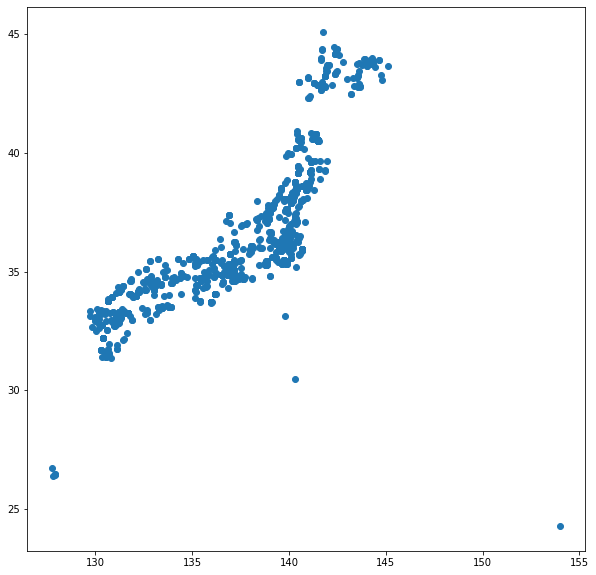

In [171]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(Japan2005.longitude, Japan2005.latitude)